In [62]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd
import seaborn as sns

In [63]:
sns.set_style("whitegrid")

In [64]:
def sigmoid(x,theta):
    y_pred = np.dot(x,theta.T)
    #y_pred = np.array([np.dot(i,theta) for i in x])
    return (1/(1+np.exp(-y_pred)))

In [65]:
def cost_logistic(theta):
    cost = np.dot( y , np.log(sigmoid(x,theta)) ) + np.dot((1-y) , np.log( 1 - sigmoid(x,theta)) ) 
    return((-1/m)*cost)

In [66]:
def gradient(diff,x_attribute):
    ## diff = sigmoid(x,theta) - y
    tot_gradient = np.dot(diff , x_attribute)
    return((1/m)*tot_gradient)

In [92]:
def gradient_descent(theta):
    parameter_list = []
    theta_0 = theta[0]
    theta_1 = theta[1]
    #diff = sigmoid(x,theta) - y
    lr = 0.01
    n_iters = 26000
    loss_list = []
    cost = cost_logistic(theta)
    #loss_list.append(cost)
    i=0
    #old = cost
    #for i in range(n_iters):
    while(1):
        parameter_list.append(theta)
        
        old=cost    
        loss_list.append(cost)
        diff = (sigmoid(x,theta)) - y
        theta_0 = theta_0 - lr * gradient(diff,x['x_0'])
        theta_1 = theta_1 - lr * gradient(diff,x['radius_mean'])
        theta = np.array([theta_0,theta_1])
        #predd = sigmoid(x,np.array(theta))
        #plt.scatter(x['radius_mean'],y)
        #plt.scatter(x['radius_mean'],predd,s=10,c="red")
        #plt.scatter(x['radius_mean'],pred_ideal,s=5,c='g')
        #plt.show()
        
        cost = cost_logistic(theta)
        
        i+=1
        if(old-cost<0.000001):
            #break
            return theta,loss_list,parameter_list
    #return theta,loss_list

In [80]:
def gradient_descent(theta):
    parameter_list = []
    theta_0 = theta[0]
    theta_1 = theta[1]
    #diff = sigmoid(x,theta) - y
    lr = 0.01
    n_iters = 26000
    loss_list = []
    cost = cost_logistic(theta)
    #loss_list.append(cost)
    i=0
    #old = cost
    for i in range(n_iters):
    #while(1):
        parameter_list.append(theta)
        old=cost    
        loss_list.append(cost)
        diff = (sigmoid(x,theta)) - y
        theta_0 = theta_0 - lr * gradient(diff,x['x_0'])
        theta_1 = theta_1 - lr * gradient(diff,x['radius_mean'])
        theta = np.array([theta_0,theta_1])
        
        cost = cost_logistic(theta)
        
        #i+=1
       # if(old-cost<0.000001):
            #break
        #    return theta,loss_list
    return theta,loss_list,parameter_list

#### Dataset read

In [69]:
data = pd.read_csv(r"C:/Users/Shivam/Desktop/datasets_180_408_data.csv")

In [70]:
x = data['radius_mean']
y = data['diagnosis']

In [71]:
m = len(x)
for i in range(len(y)):
    if y[i] == 'B':
        y[i] = 0
    else:
        y[i] = 1
y = y.astype("int64")

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [72]:
x = pd.DataFrame(x,columns=['x_0','radius_mean'])
x['x_0'] = 1

#### Optimum theta values

In [14]:
cost_logistic(np.array([-8.19393897,0.54291739]))   ### optimal values of theta when not scaled

0.536847421372576

In [76]:
cost_logistic(np.array([-0.6308762,3.3192202]))    ### optimal values of theta when scaled

0.31173299455689557

In [942]:
pred_ideal = sigmoid(x,np.array([-8.19393897,0.54291739]))

In [77]:
pred_ideal = sigmoid(x,np.array([-0.6308762,3.3192202]))

#### Feature scaling

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

#### main function  4.4 2.3

In [93]:
theta = np.array([8.4, 23.0])

In [94]:
theta_hat,loss_list,parameter_list = gradient_descent(np.array(theta))

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [95]:
loss_list[-2]-loss_list[-1],loss_list[-4]-loss_list[-3]

(1.0001882646548665e-06, 1.0005948256064379e-06)

In [96]:
loss_list[-1]

0.313280468251798

loss_list

In [98]:
theta_hat,(logistic.intercept_,logistic.coef_)

(array([8.4       , 4.65427692]), (array([-0.6308762]), array([[3.3192202]])))

In [99]:
theta

array([ 8.4, 23. ])

parameter_list

ideal case : [-8.19393897,0.54291739] , cost = 0.3297630187050258 , accuracy = 0.8857644991212654

theta : [0.9, 0.7] , iterations = 26000 , cost = 0.3297630187050258 , cost_diff_last_two_points= 2.0178545605542553e-06 , lr = 0.01 , theta_hat = [-8.2538008 ,  0.54704487] , accuracy = 0.8857644991212654

theta : [0.9, 0.7] , terminating condition = old-cost<0.000001 , theta_hat = [-9.52197535,  0.63472617] , lr = 0.01          cost = 0.3136376736721564 , accuracy = 0.8892794376098418

theta : [4.5, 8.2] , iterations = 26000 , cost = 0.33468769859271474 , cost_diff_last_two_points = 2.472443512924194e-06 , lr = 0.01 , theta_hat = [-7.86793517,  0.52044936] , accuracy = 0.8857644991212654

theta : [4.5, 8.2] , terminating condition = old-cost<0.000001 , theta_hat = [-9.5220065 ,  0.63472832] , lr = 0.01 ,        cost : 0.3136373613705443 , accuracy = 0.8892794376098418

In [101]:
pred = sigmoid(x,np.array(theta_hat))

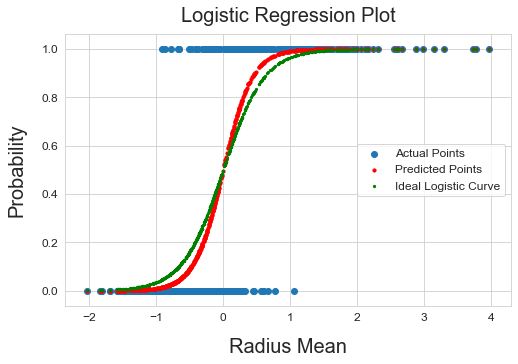

In [102]:
plt.figure(figsize=(8,5))
plt.scatter(x['radius_mean'],y)
plt.scatter(x['radius_mean'],pred,s=10,c="red")
plt.scatter(x['radius_mean'],pred_ideal,s=5,c='g')
plt.xlabel("Radius Mean",fontsize = 20,labelpad=15)
plt.ylabel("Probability",fontsize = 20, labelpad=15)
plt.title("Logistic Regression Plot",fontsize=20, pad=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(['Actual Points','Predicted Points','Ideal Logistic Curve'],loc='right',fontsize=12)
plt.show()

In [32]:
y.unique()

array([1, 0], dtype=int64)

list(zip(pred,y,pred_ideal))

In [34]:
for i in range(m):
    if(pred[i]>=0.5):
        pred[i] = 1
    else:
        pred[i] = 0

In [1047]:
for i in range(m):
    if(pred_ideal[i]>=0.5):
        pred_ideal[i] = 1
    else:
        pred_ideal[i] = 0

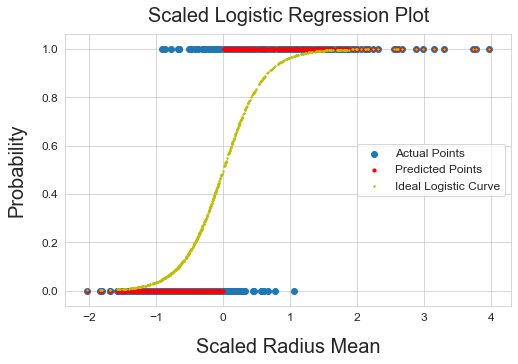

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(x['radius_mean'],y)
plt.scatter(x['radius_mean'],pred,s=10,c="red")
plt.scatter(x['radius_mean'],pred_ideal,s=2,c='y')
plt.xlabel("Scaled Radius Mean",fontsize = 20,labelpad=15)
plt.ylabel("Probability",fontsize = 20, labelpad=15)
plt.title("Scaled Logistic Regression Plot",fontsize=20, pad=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(['Actual Points','Predicted Points','Ideal Logistic Curve'],loc='right',fontsize=12)
plt.show()

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y)

0.8629173989455184

0.8629173989455184

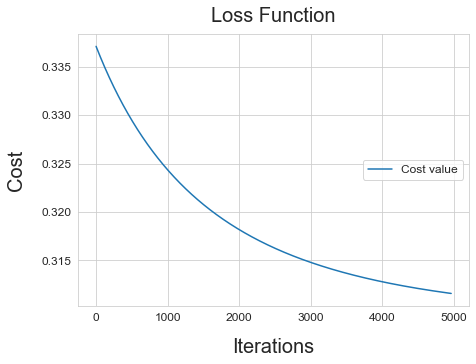

In [37]:
plt.figure(figsize=(7,5))
plt.plot(loss_list)
plt.xlabel("Iterations",fontsize = 20,labelpad=15)
plt.ylabel("Cost",fontsize = 20, labelpad=15)
plt.title("Loss Function",fontsize=20, pad=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(['Cost value'],loc='right',fontsize=12)
plt.show()

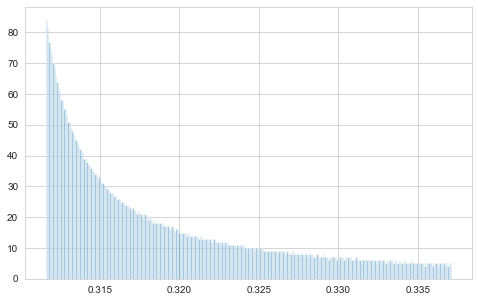

In [38]:
plt.figure(figsize=(8,5))
sns.distplot(loss_list,kde=False,bins=300)
plt.show()

In [39]:
theta1 = [parameter_list[i][1] for i in range(len(parameter_list))]

#### when gradient descent is terminated on the basis of cost condition , this had around 7000 iterations

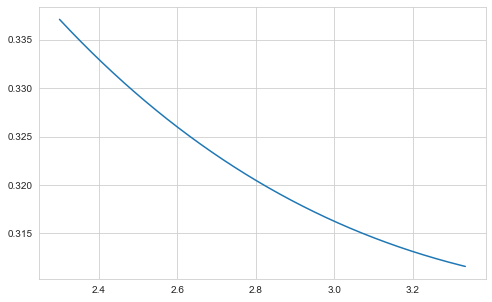

In [40]:
plt.figure(figsize=(8,5))
plt.plot(theta1,loss_list)
plt.show()

In [41]:
len(loss_list)

4962

#### when 26000 iterations cost goes little more deeper

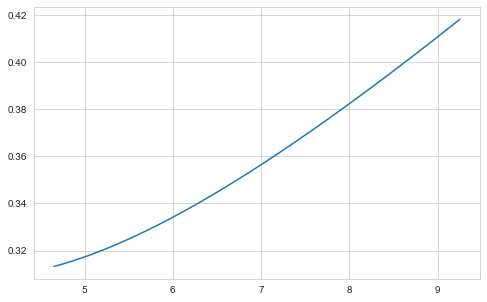

In [1006]:
plt.figure(figsize=(8,5))
plt.plot(theta1,loss_list)
plt.show()

In [1007]:
len(parameter_list)

43306

check also no. of iterations becomes less when we scale the data compared to the non scaled data for same theta values

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logistic = LogisticRegression()

In [25]:
logistic.fit(x['radius_mean'].values.reshape(-1,1),y)

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1196]:
pred_ideal = logistic.predict(x['radius_mean'].values.reshape(-1,1))

In [26]:
logistic.intercept_,logistic.coef_

(array([-0.6308762]), array([[3.3192202]]))

In [54]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
fp_rate,tp_rate,thresholds = roc_curve(y,pred)
fp_rate,tp_rate,thresholds

(array([0.        , 0.12885154, 1.        ]),
 array([0.       , 0.8490566, 1.       ]),
 array([2., 1., 0.]))

In [46]:
roc_auc = auc(fp_rate,tp_rate)
roc_auc

0.8601025315786692

In [49]:
confusion_matrix(y,pred)

array([[311,  46],
       [ 32, 180]], dtype=int64)

In [56]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       357
           1       0.80      0.85      0.82       212

    accuracy                           0.86       569
   macro avg       0.85      0.86      0.86       569
weighted avg       0.87      0.86      0.86       569



In [61]:
missclassification_rate = round(np.mean(pred!=y),3)*100
missclassification_rate

13.700000000000001

In [50]:
np.size(a = np.where(pred==y))/m    ## Accuracy = (TP+TN)/(TP+FP+FP+FN)

0.8629173989455184

In [1168]:
a = np.where(pred==1)

In [1169]:
b = np.where(y==1)

In [1170]:
np.size([a[0][i]!=b[0][j] for i in range(len(a)) for j in range(len(b))])

1

In [1126]:
np.size(np.where(a!=b))/(np.size(np.where(pred==1)))    ### may be it is false positive ratio

0.34513274336283184